In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-wave-speed)

In [2]:
from scipy.integrate import solve_ivp
m = 120
x, Dx, Dxx = FNC.diffcheb(m, [-1, 1])
chop = lambda u: u[1:-1]
extend = lambda v: hstack([0, v, 0])
def dw_dt(t, w):
    u = extend(w[:m-1])
    z = w[m-1:]
    du_dt = Dx @ z
    dz_dt = c**2 * (Dx @ u)
    return hstack([chop(du_dt), dz_dt])

u_init = exp(-100 * x**2)
z_init = -u_init
w_init = hstack([chop(u_init), z_init])

In [3]:
c = 1 + (sign(x) + 1) / 2
sol = solve_ivp(dw_dt, (0, 5), w_init, dense_output=True, method="Radau")
u = lambda t: extend(sol.sol(t)[:m-1])

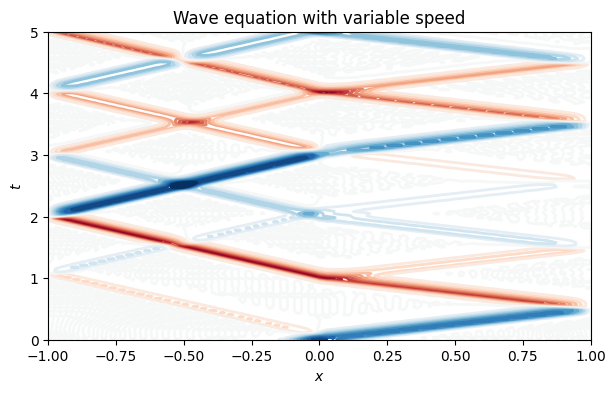

In [4]:
t = linspace(0, 5, 150)
U = [u(tj) for tj in t]
contour(x, t, U, levels=24, cmap="RdBu", vmin=-1, vmax=1)
xlabel("$x$"),  ylabel("$t$")
title("Wave equation with variable speed");

In [5]:
from matplotlib.animation import FuncAnimation
fig, ax = subplots()
curve = ax.plot(x, u_init)[0]
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.set_xlabel("$x$")
ax.set_ylabel("$u(x,t)$")
ax.set_ylim(-1.05, 1.05)
ax.set_title("Wave equation with variable speed")

def snapshot(t):
    curve.set_ydata(u(t))
    time_text.set_text(f"t = {t:.2f}")
anim = FuncAnimation(fig, snapshot, frames=linspace(0, 5, 251)    )
anim.save("wave-speed.mp4", fps=30)
close()